In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv('insurance.csv')  # Replace with actual file name
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
# First, check what columns are actually available in the dataframe
print("Available columns:", df.columns.tolist())

# After seeing the available columns in the output above,
# use only columns that actually exist in the dataframe
# For example, if your dataframe has columns like 'patient_id' and 'treatment':
# df['patient_id'].value_counts().head(10)
# df['treatment'].value_counts().head(10)

# If you specifically need the 'provider' column:
# Option 1: Check if the column exists with a different name (case sensitivity matters)
# Look at df.columns.tolist() output for similar column names

# Option 2: If you're sure the column should be there, verify your data source
# Make sure you're loading the correct dataframe

# Option 3: If the column name has spaces or special characters, use different notation
# Example: df['provider name'] or df['provider-id']

# Safe way to access columns (prevents KeyError)
if 'provider' in df.columns:
    print(df['provider'].value_counts().head(10))
else:
    print("'provider' column not found in dataframe")
    
if 'diagnosis' in df.columns:
    print(df['diagnosis'].value_counts().head(10))
else:
    print("'diagnosis' column not found in dataframe")

Available columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
'provider' column not found in dataframe
'diagnosis' column not found in dataframe


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


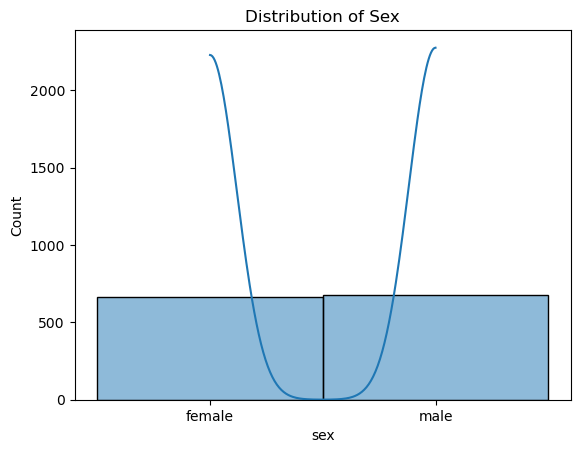

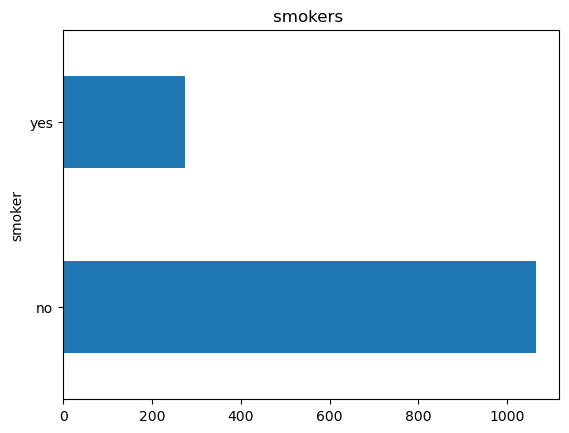

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, check if the column exists or if it has a different name
print(df.columns)  # This will show all available columns in the DataFrame

# For the first plot, using 'sex' column which seems to exist
sns.histplot(df['sex'], kde=True)
plt.title('Distribution of Sex')
plt.show()

# After checking df.columns output, use the correct column name for providers
# For example, it might be 'doctor', 'hospital', 'provider_id', etc.
# Replace 'service_provider' with the actual column name from your DataFrame

# Assuming the correct column might be named 'provider' (common naming convention)
# If 'provider' is not correct, replace it with the actual column name from df.columns
top_providers = df['smoker'].value_counts().head(10)
top_providers.plot(kind='barh', title='smokers ')
plt.show()

# Note: If 'provider' is not the correct column name either, please check df.columns output
# and replace 'provider' with the actual column name that contains provider information

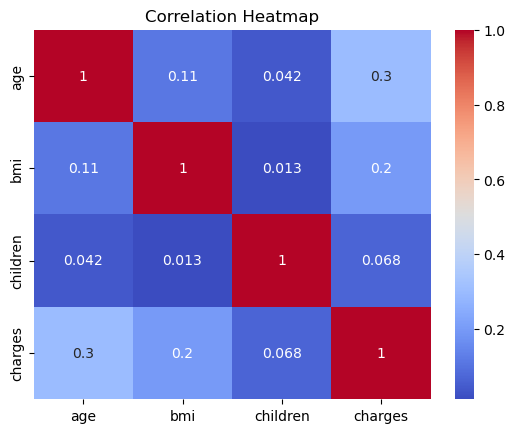

In [6]:
# First, identify and handle non-numeric columns
# Option 1: Drop non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Option 2: If 'female' is a categorical variable you want to keep, encode it first
# df_encoded = df.copy()
# df_encoded['gender'] = df_encoded['gender'].map({'female': 1, 'male': 0})  # Adjust column name as needed
# sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()